In [263]:
import pandas as pd
data = pd.read_csv('global_country_data_copy.csv', skiprows=4)
df = pd.DataFrame(data)
df1 = df.copy()
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,54.495678,54.588701,54.585630,54.674206,54.873448,55.181477,...,69.620827,69.352325,69.027743,68.681269,68.320569,67.962515,67.712003,67.657094,67.617079,NaN
1,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.131043,42.949419,42.852732,42.661157,42.359159,41.936664,...,19.045505,18.799607,18.571721,18.334859,18.069771,17.767339,17.351022,16.799407,16.240782,NaN
2,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43619,Zimbabwe,ZWE,"Literacy rate, adult female (% of females ages...",SE.ADT.LITR.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.283829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.199997,NaN
43620,Zimbabwe,ZWE,"Literacy rate, youth total (% of people ages 1...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,90.428123,NaN,NaN,NaN,NaN,83.720001,NaN,NaN,90.860001,NaN
43621,Zimbabwe,ZWE,"Literacy rate, youth male (% of males ages 15-24)",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,87.591858,NaN,NaN,NaN,NaN,78.369995,NaN,NaN,86.750000,NaN
43622,Zimbabwe,ZWE,"Literacy rate, youth (ages 15-24), gender pari...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.060060,NaN,NaN,NaN,NaN,1.117952,NaN,NaN,1.083950,NaN


## Finding the best year with most data

In [264]:
columns = df1.columns.to_list()
years = ['2018']
#uncomment this line to look at amount of data data for each year
#years = ['2018', '2019', '2020', '2021', '2022']
for x in years:
    df2 = df1.copy()
    df2 = df2.loc[:, ['Country Name','Indicator Name', x]]
    df2 = df2.pivot(index = 'Country Name', columns = 'Indicator Name', values = x)
    columns = df2.columns.to_list()
    indicators = []
    values = []
    for column in columns:
        if len(df2[column].unique()) > 200:
            indicators.append(column)
            values.append(len(df2[column].unique()))

    good_indicators = pd.DataFrame({'Indicators': indicators,
                                    'Number of Rows with Data': values})
    print(x)   
    #print((good_indicators))
good_indicators

2018


,Indicators,Number of Rows with Data
0,"Labor force, female (% of total labor force)",233
1,"Labor force, total",233
2,Number of deaths ages 10-14 years,203
3,Number of deaths ages 15-19 years,222
4,Number of deaths ages 20-24 years,224
5,Number of deaths ages 5-9 years,203
6,Population ages 0-14 (% of total population),264
7,Population ages 15-64 (% of total population),264
8,"Primary education, pupils",217
9,"School enrollment, preprimary (% gross)",202


In [265]:
# creates best dataset
df3 = df2.loc[:, indicators]
df3

Indicator Name,"Labor force, female (% of total labor force)","Labor force, total",Number of deaths ages 10-14 years,Number of deaths ages 15-19 years,Number of deaths ages 20-24 years,Number of deaths ages 5-9 years,Population ages 0-14 (% of total population),Population ages 15-64 (% of total population),"Primary education, pupils","School enrollment, preprimary (% gross)","School enrollment, primary (% gross)","School enrollment, primary (gross), gender parity index (GPI)","School enrollment, primary, female (% gross)","School enrollment, primary, male (% gross)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,22.758726,9.613728e+06,1958.0,11959.0,13358.0,2842.0,44.708445,52.884462,6544906.0,NaN,107.780533,0.66691,86.190132,128.287537,13.924000,10.281000,11.110000
Africa Eastern and Southern,47.253574,2.635412e+08,89307.0,148796.0,166725.0,150575.0,42.052776,54.834273,112928976.0,28.961510,104.289360,0.95805,101.823479,106.722160,7.417153,6.461406,6.913046
Africa Western and Central,44.338121,1.534623e+08,85188.0,91246.0,97712.0,170197.0,43.721214,53.386094,64573820.0,23.339550,88.606934,0.95494,86.300819,90.853508,4.196894,4.205429,4.201599
Albania,43.392704,1.409389e+06,38.0,75.0,101.0,32.0,17.083082,68.066585,170861.0,80.498734,107.403679,1.03765,104.839172,109.826767,11.876000,12.625000,12.300000
Algeria,19.460834,1.222143e+07,1153.0,1519.0,2117.0,1488.0,30.208065,64.121529,4429994.0,NaN,108.703484,0.95499,106.400612,110.903572,18.588000,8.442000,10.416000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,20.615678,1.191792e+06,213.0,373.0,472.0,237.0,39.968222,56.737043,488184.0,56.479252,96.747879,1.00261,95.823601,97.651527,41.621000,22.271000,26.260000
World,39.277186,3.393224e+09,363577.0,602862.0,744725.0,512474.0,26.066281,64.966738,732499648.0,60.067478,99.394630,0.98221,98.396408,100.329697,5.718692,5.684928,5.698210
"Yemen, Rep.",7.827071,6.894546e+06,1966.0,6538.0,10981.0,3935.0,40.820397,56.433893,NaN,NaN,NaN,NaN,NaN,NaN,25.272000,12.040000,13.076000


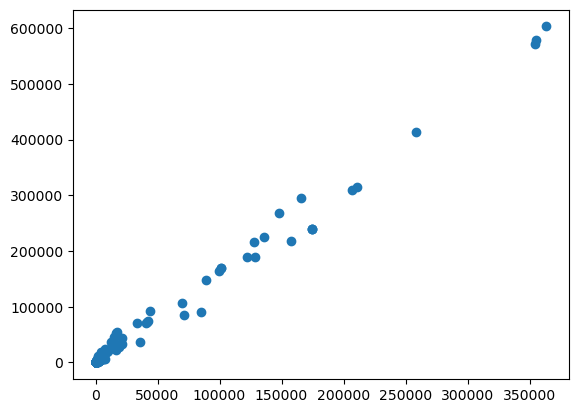

In [266]:
# test
import matplotlib.pyplot as plt

plt.scatter(df3['Number of deaths ages 10-14 years'], df3['Number of deaths ages 15-19 years'])